In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import os
import json
import zipfile
import networkx as nx
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.figure_factory as ff

from tqdm import tqdm
from matplotlib import rc
from matplotlib import colormaps
from collections import defaultdict

In [86]:
df = pd.read_csv('../data/blackbox_papers.csv', index_col=0)
df

,id,title,area,interpretability,doi,source,abstract,embedding,year,semantic_scholar_id
0,NaN,Knowledge-Grounded Natural Language Recommenda...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.1,BLACKBOX2023,Explanations accompanying a recommendation can...,[-1.99784446e+00 -5.63432097e-01 -1.15631664e+...,2023,172e75ba47cd4f50ef62f63a4251fdbb11b16525
1,NaN,Emergent Linear Representations in World Model...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.2,BLACKBOX2023,How do sequence models represent their decisio...,[-1.39291659e-02 -7.61164367e-01 -8.94706845e-...,2023,bb26227a94ddb2b0088a23e2ec0a170c40bc4d78
2,NaN,Explaining Data Patterns in Natural Language w...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.3,BLACKBOX2023,Large language models (LLMs) have displayed an...,[-9.06076550e-01 -3.10293108e-01 -1.91844013e-...,2023,1583892eea9efb06424a03cdf0144a096c7853ac
3,NaN,Probing Quantifier Comprehension in Large Lang...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.4,BLACKBOX2023,"With their increasing size, large language mod...",[-3.29036236e-01 6.29768729e-01 6.53352261e-...,2023,bd9a20c03adc415ff33acf28107c154c12c7dcca
4,NaN,Disentangling the Linguistic Competence of Pri...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.5,BLACKBOX2023,Differential Privacy (DP) has been tailored to...,[ 5.18441439e-01 3.09557021e-01 -6.33746982e-...,2023,250714259193e7dafb02d4948be892618953ebf7
...,...,...,...,...,...,...,...,...,...,...
164,NaN,Adversarial Attack on Sentiment Classification,Blackbox,True,10.18653/v1/W19-4824,BLACKBOX2019,"In this paper, we propose a white-box attack a...",[-1.10305023e+00 -8.87663662e-01 -7.74790347e-...,2019,9ff7f170db0ef2fc7ffbbc6776f55dcf24edfa85
165,NaN,Open Sesame: Getting inside BERT's Linguistic ...,Blackbox,True,10.18653/v1/W19-4825,BLACKBOX2019,How and to what extent does BERT encode syntac...,[ 3.11164171e-01 7.63277709e-01 -1.08210191e-...,2019,165d51a547cd920e6ac55660ad5c404dcb9562ed
166,NaN,GEval: Tool for Debugging NLP Datasets and Models,Blackbox,True,10.18653/v1/W19-4826,BLACKBOX2019,This paper presents a simple but general and e...,[-4.76774335e-01 4.05399144e-01 -2.83678204e-...,2019,a8f463b648e602289b8880ee533f1b0ff6b33c21
167,NaN,From Balustrades to Pierre Vinken: Looking for...,Blackbox,True,10.18653/v1/W19-4827,BLACKBOX2019,We inspect the multi-head self-attention in Tr...,[-8.65607411e-02 6.66429043e-01 -1.47939727e-...,2019,7886bf8d86a8ae22aa0fcf8a77d2c8a4d9429aa1


In [87]:
df['year'] = df['source'].str[-4:].astype(int)
df

,id,title,area,interpretability,doi,source,abstract,embedding,year,semantic_scholar_id
0,NaN,Knowledge-Grounded Natural Language Recommenda...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.1,BLACKBOX2023,Explanations accompanying a recommendation can...,[-1.99784446e+00 -5.63432097e-01 -1.15631664e+...,2023,172e75ba47cd4f50ef62f63a4251fdbb11b16525
1,NaN,Emergent Linear Representations in World Model...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.2,BLACKBOX2023,How do sequence models represent their decisio...,[-1.39291659e-02 -7.61164367e-01 -8.94706845e-...,2023,bb26227a94ddb2b0088a23e2ec0a170c40bc4d78
2,NaN,Explaining Data Patterns in Natural Language w...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.3,BLACKBOX2023,Large language models (LLMs) have displayed an...,[-9.06076550e-01 -3.10293108e-01 -1.91844013e-...,2023,1583892eea9efb06424a03cdf0144a096c7853ac
3,NaN,Probing Quantifier Comprehension in Large Lang...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.4,BLACKBOX2023,"With their increasing size, large language mod...",[-3.29036236e-01 6.29768729e-01 6.53352261e-...,2023,bd9a20c03adc415ff33acf28107c154c12c7dcca
4,NaN,Disentangling the Linguistic Competence of Pri...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.5,BLACKBOX2023,Differential Privacy (DP) has been tailored to...,[ 5.18441439e-01 3.09557021e-01 -6.33746982e-...,2023,250714259193e7dafb02d4948be892618953ebf7
...,...,...,...,...,...,...,...,...,...,...
164,NaN,Adversarial Attack on Sentiment Classification,Blackbox,True,10.18653/v1/W19-4824,BLACKBOX2019,"In this paper, we propose a white-box attack a...",[-1.10305023e+00 -8.87663662e-01 -7.74790347e-...,2019,9ff7f170db0ef2fc7ffbbc6776f55dcf24edfa85
165,NaN,Open Sesame: Getting inside BERT's Linguistic ...,Blackbox,True,10.18653/v1/W19-4825,BLACKBOX2019,How and to what extent does BERT encode syntac...,[ 3.11164171e-01 7.63277709e-01 -1.08210191e-...,2019,165d51a547cd920e6ac55660ad5c404dcb9562ed
166,NaN,GEval: Tool for Debugging NLP Datasets and Models,Blackbox,True,10.18653/v1/W19-4826,BLACKBOX2019,This paper presents a simple but general and e...,[-4.76774335e-01 4.05399144e-01 -2.83678204e-...,2019,a8f463b648e602289b8880ee533f1b0ff6b33c21
167,NaN,From Balustrades to Pierre Vinken: Looking for...,Blackbox,True,10.18653/v1/W19-4827,BLACKBOX2019,We inspect the multi-head self-attention in Tr...,[-8.65607411e-02 6.66429043e-01 -1.47939727e-...,2019,7886bf8d86a8ae22aa0fcf8a77d2c8a4d9429aa1


In [88]:
dois = list(df['doi'])

In [89]:
from utils import bulk_get_paper_details

papers = bulk_get_paper_details(dois)

Fetching papers: 1it [00:00,  1.11it/s]


In [90]:
ssids = []
for paper in papers:
    if paper:
        ssids.append(paper.paper_id)
    else:
        ssids.append(None)
ssids

[None,
 None,
 '1583892eea9efb06424a03cdf0144a096c7853ac',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'f0359e993b444e002479a3f2a7177c11e4e432ba',
 None,
 'e44468eaa673db8638102c5b804428cd5493e65c',
 '2aeab8d81f8c43572db03294d90f023f4403729e',
 'd8f413cb08d0db8679ab9c7dbc88a62bf29209f5',
 '441ce66707fc4df815904afc30aa1f32880fca10',
 '0ff1b5c699ffdfa00ee4191e8959ba27cacc6713',
 None,
 None,
 None,
 'a1f0a972473ac0ffbe7d117597a0ba6ce7f78880',
 None,
 None,
 '825171f9fa2882d692110f5abe83bba6e5c3059c',
 None,
 '5bea6742c0d16e04a518d1a08d52fd792824c76e',
 '83d18d225e3a1fa724ac5be5327b1f79d48ae643',
 None,
 '16da1d05fdb859861d41a311d0460df6f5fe5838',
 '62394648facd628a87021a7ef803d0e6efeddee5',
 None,
 None,
 '3e7cf804e6a57030368e7d01386738dc8852df50',
 '6f0be1f9bda7530b1fa654cac84d595ca9d53740',
 '5c8cb5d39aa8531fcb5962821ac404e4a0e109d1',
 None,
 None,
 'e2216806be6e2c300e2333226a553b7bd9783152',
 '02ef976bc4aedceca2a6d7577975113db1e0e26d',
 None,
 '97caab3dfecf6234519d254e250

In [91]:
df['semantic_scholar_id'] = ssids

In [92]:
df

,id,title,area,interpretability,doi,source,abstract,embedding,year,semantic_scholar_id
0,NaN,Knowledge-Grounded Natural Language Recommenda...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.1,BLACKBOX2023,Explanations accompanying a recommendation can...,[-1.99784446e+00 -5.63432097e-01 -1.15631664e+...,2023,None
1,NaN,Emergent Linear Representations in World Model...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.2,BLACKBOX2023,How do sequence models represent their decisio...,[-1.39291659e-02 -7.61164367e-01 -8.94706845e-...,2023,None
2,NaN,Explaining Data Patterns in Natural Language w...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.3,BLACKBOX2023,Large language models (LLMs) have displayed an...,[-9.06076550e-01 -3.10293108e-01 -1.91844013e-...,2023,1583892eea9efb06424a03cdf0144a096c7853ac
3,NaN,Probing Quantifier Comprehension in Large Lang...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.4,BLACKBOX2023,"With their increasing size, large language mod...",[-3.29036236e-01 6.29768729e-01 6.53352261e-...,2023,None
4,NaN,Disentangling the Linguistic Competence of Pri...,Blackbox,True,10.18653/v1/2023.blackboxnlp-1.5,BLACKBOX2023,Differential Privacy (DP) has been tailored to...,[ 5.18441439e-01 3.09557021e-01 -6.33746982e-...,2023,None
...,...,...,...,...,...,...,...,...,...,...
164,NaN,Adversarial Attack on Sentiment Classification,Blackbox,True,10.18653/v1/W19-4824,BLACKBOX2019,"In this paper, we propose a white-box attack a...",[-1.10305023e+00 -8.87663662e-01 -7.74790347e-...,2019,9ff7f170db0ef2fc7ffbbc6776f55dcf24edfa85
165,NaN,Open Sesame: Getting inside BERT's Linguistic ...,Blackbox,True,10.18653/v1/W19-4825,BLACKBOX2019,How and to what extent does BERT encode syntac...,[ 3.11164171e-01 7.63277709e-01 -1.08210191e-...,2019,165d51a547cd920e6ac55660ad5c404dcb9562ed
166,NaN,GEval: Tool for Debugging NLP Datasets and Models,Blackbox,True,10.18653/v1/W19-4826,BLACKBOX2019,This paper presents a simple but general and e...,[-4.76774335e-01 4.05399144e-01 -2.83678204e-...,2019,a8f463b648e602289b8880ee533f1b0ff6b33c21
167,NaN,From Balustrades to Pierre Vinken: Looking for...,Blackbox,True,10.18653/v1/W19-4827,BLACKBOX2019,We inspect the multi-head self-attention in Tr...,[-8.65607411e-02 6.66429043e-01 -1.47939727e-...,2019,7886bf8d86a8ae22aa0fcf8a77d2c8a4d9429aa1


In [93]:
import requests
from utils import API_KEY
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


def search_paper_by_title(title):
    base_url = 'https://api.semanticscholar.org/graph/v1/paper/search'
    response = requests.get(base_url, params={'query': title}, headers={"x-api-key": API_KEY})
    
    paper_dict = response.json()
    if 'data' not in paper_dict:
        return None
        
    for result in paper_dict['data']:
        if similar(title.lower(), result['title'].lower()) > 0.90:
            return result['paperId']
    


search_paper_by_title("Knowledge-Grounded Natural Language Recommendation Explanation")

'172e75ba47cd4f50ef62f63a4251fdbb11b16525'

In [94]:
for index, row in df.iterrows():
    if pd.isna(row['semantic_scholar_id']):
        df.at[index, 'semantic_scholar_id'] = search_paper_by_title(row['title'])

KeyboardInterrupt: 

df

In [ ]:
df[pd.isna(df['semantic_scholar_id'])]

In [ ]:
df['title'] = df['title'].apply(lambda title: title.replace('{', '').replace('}', ''))

# Plots

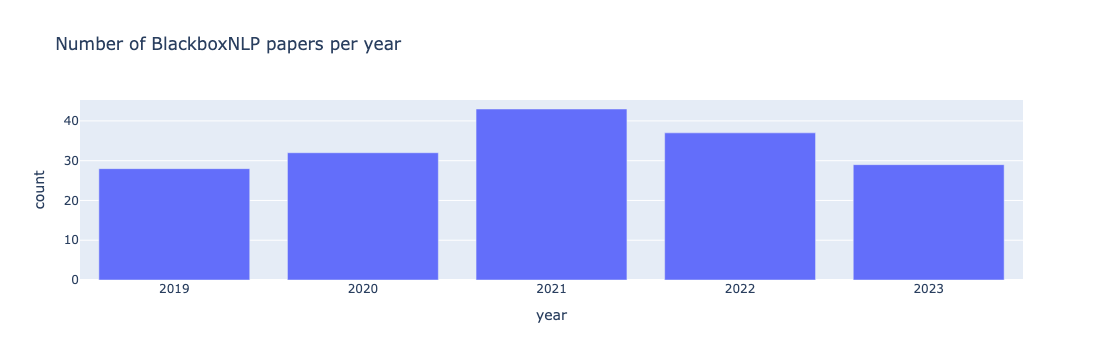

In [96]:
year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']
year_counts = year_counts.sort_values('year')

fig = px.bar(year_counts, x='year', y='count', title='Number of BlackboxNLP papers per year')
fig.show()

In [43]:
from utils import get_citation_details
ssids = list(df['semantic_scholar_id'])

all_citations = []
for ssid in tqdm(ssids):
    citations = get_citation_details(ssid, include_abstract=True)
    all_citations += citations

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [01:02<00:00,  2.68it/s]


In [44]:
len(all_citations)

4157

In [45]:
n = 0
for citation in all_citations:
    if citation.abstract:
        n += 1
n

3863

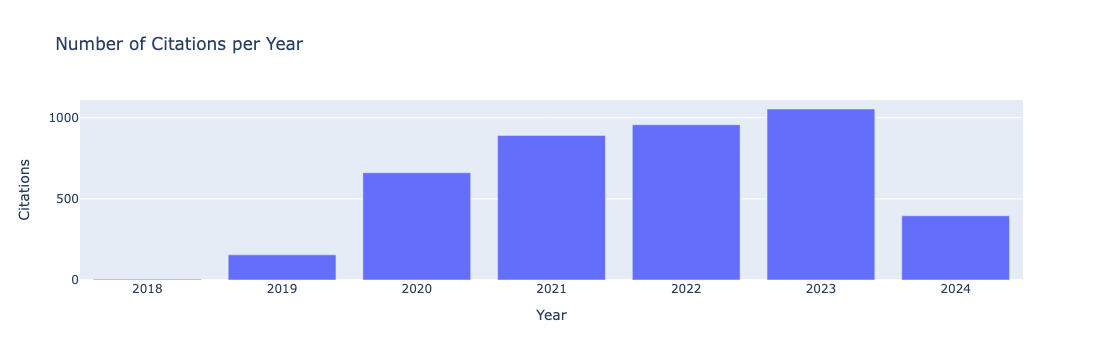

In [97]:
import plotly.express as px
import pandas as pd
from collections import Counter

years = [citation.year for citation in all_citations]
citation_count = Counter(years)
df = pd.DataFrame(list(citation_count.items()), columns=['Year', 'Citations'])
df = df.sort_values('Year')
fig = px.bar(df, x='Year', y='Citations', title='Number of Citations per Year')
fig.show()


In [101]:
import importlib
import classifier
importlib.reload(classifier)

tracks_and_years = []

for citation in tqdm(all_citations):
    if citation.abstract:
        track = classifier.predict_track(citation.title, citation.abstract)
        year = citation.year
        tracks_and_years.append((track, year))
        

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4157/4157 [11:37<00:00,  5.96it/s]


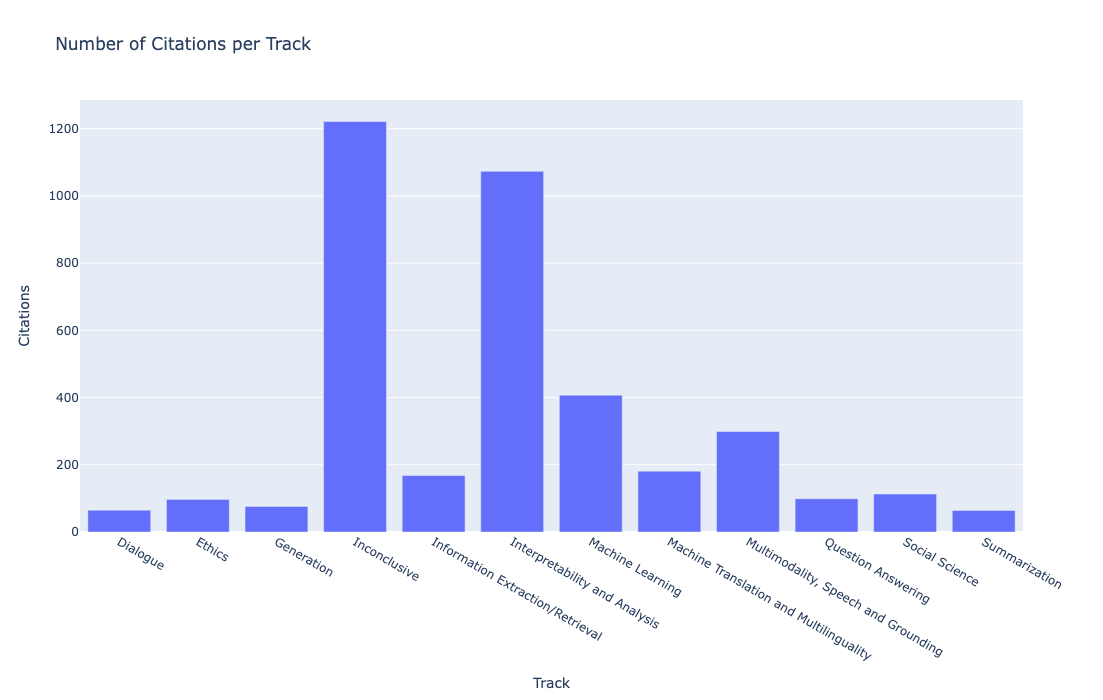

In [103]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(tracks_and_years, columns=['Track', 'Year'])

df_counts = df.groupby(['Track']).size().reset_index(name='Citations')

fig = px.bar(df_counts, x='Track', y='Citations', title='Number of Citations per Track', height=700)
fig.show()


In [105]:
df_counts.to_csv('../paper_plots/blackbox-citations-track.csv')

In [60]:
papers = bulk_get_paper_details(ssids)

Fetching papers: 1it [00:00,  1.34it/s]


In [65]:
papers.sort(key=lambda paper: paper.citation_count, reverse=True)

In [81]:

citation_data = []
for paper in tqdm(papers[:50]):
    citations = get_citation_details(paper.paper_id, include_abstract=True)
    for citation in citations:
        predicted_track = None
        if citation.abstract:
            predicted_track = predict_track(citation.title, citation.abstract)
        citation_data.append({
            'cited_paper_title': paper.title,
            'cited_paper_id': paper.paper_id,
            'citin_paper_title': citation.title,
            'cited_paper_id': citation.paper_id,
            'result': citation.cites_result,
            'background': citation.cites_background,
            'methodology': citation.cites_methodology,
            'influential': citation.is_influential_citation,
            'abstract': citation.abstract,
            'predicted_track': predicted_track,
        })
pd.DataFrame(citation_data).to_csv('blackbox-papers-citations.csv')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [08:03<00:00,  9.68s/it]
